<a href="https://colab.research.google.com/github/m-mahbub007/Course_MSE7530/blob/main/Day2_final_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2: Getting Started in Colab, Github, and Python

The first thing we need to do is set up an environment where we can all use common files. I will primarily write notebooks so that you are directly using the public Github repository. However, later on, you may decide to keep files on your Google Drive and use them from there.

## Example 1 : Getting Around and Getting Started

### Method 1: Pulling Files from the Class Github Repo

In [2]:
!git clone https://github.com/cbishop4/MSE7530.git # this will clone everything from my public GH into your files

Cloning into 'MSE7530'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 91 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 6.03 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (31/31), done.


This will make files available. After you run this, the files will become available in the sidebar, like in this image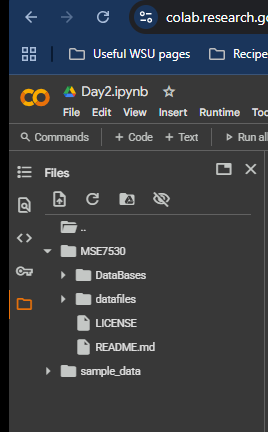

If you ever need to reload the GH Repo for some reason (like if I'm changing it while the class is working on a homework assignment), run the following cell:

In [3]:
!rm -rf /content/MSE7530/

And then re-run the git clone.

In [4]:
!git clone https://github.com/cbishop4/MSE7530.git

Cloning into 'MSE7530'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 91 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 6.03 MiB | 8.88 MiB/s, done.
Resolving deltas: 100% (31/31), done.


### Method 2: Mounting your Google Drive
This will be helpful when you are working with your own data in various projects throughout this class. Simply run the following cell. It will prompt you to confirm that you want to connect to your Google account, and may require you to log in.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To grab files and content to work with, hover over a file, click on the 3 dots that appear to the right, and hit "copy path". Paste this into a code cell to work with the file.

In [ ]:
'/content/drive/MyDrive/7530_Docs/181119_PeakFitting.ipynb' # example from Camille's personal drive

### This is the end of the first example for today. Please return your attention to the powerpoint.

## Example 2 : Encouraged Use of Gemini
Goal: Less time teaching Python syntax, more time learning science

Let's start with a simple example, in which we can use our Python notebook to do some simple math.

In [5]:
7 + 8

15

Above we did some simple arithmetic. Now, let's introduce an error to see how we can use Gemini's error explainer. After running this cell, hit "explain error".

In [ ]:
7 + 9i

What happened here? Now try this one.

In [ ]:
7 + 8'

### Lesson:
The error explainer is powerful, but is not always right. Always check the plain language Gemini gives in the error explainer and see if it is answering the problem you mean to solve

## Basic Python Skill 1 : Plotting Data

The best way to make sure you're working with the right thing in Python is to plot your data. The most basic and widely used library to do this is Matplotlib. We start by importing the package (note: this is one of the 2 - 5 lines on the basic import cell that starts almost every Python notebook or script)

In [ ]:
import matplotlib.pyplot as plt

We will start with a dataset of random noise that I generated using AI. (Prompt: "Generate a dataset of random but gradually increasing noise, with time as the independent variable and intensity as the dependent variable". The resulting code is shown below)

In [ ]:
time = np.linspace(0, 10, 100)  # Time from 0 to 10
intensity = time * 2 + np.random.normal(0, 1, 100)  # Gradually increasing intensity with random noise

There are two slightly different ways to plot in Matplotlib, and they have annoyingly different syntaxes. I will show you the first way here, which we will generally not use:

In [ ]:
plt.plot(time, intensity)

However, a way to make more customizable plots is through the "subplots" module. This allows you to put multiple graphs in the same object, and lets you define figure and axes objects that can be modified later. Here, what we are technically doing is using a plot() **method** on an axes **object** which we defined when we called the initial plt.subplots().
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

In [ ]:
fig, ax = plt.subplots()

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, intensity)

In [ ]:
# now, let's dress this up a bit so we have a presentable graph
fig, ax = plt.subplots()
ax.plot(time, intensity,'-o',markersize=2, )
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity')
ax.set_title('Random Noise Over Time')

At its most basic, that is how you make a plot. For now, I will not have requirements about font sizes, colors, etc. The only requirements for right now are that axes are labeled. **However**, in later units of the class we will cover how to make graphs accessible and clear.
To learn how to change other aspects of your graph, you can look at documentation. You can also hit shift+tab while typing out a function, and it will give you information about the arguments you can include.

#### <font color='green'>**I would like you to have a basic idea of how to plot data. However, the syntax can get annoying, and a nicely made plot can have near 40 lines of code specifying every detail. If you want to use built-in plotting routines within Colab notebooks, unless prohibited by a specific problem, you may.**</font>

## Example 3 : Querying the NIST Webbook
In this example we'll have you start writing some code. Anywhere <font color='red'>where the font is red, you need to write your own code in the next box</font>

### Part 1 : Prepare our data access
NIST, (the National Institute of Standards and Technology), publishes standard reference data and makes standard reference materials. They maintain the NIST Chemistry WebBook at https://webbook.nist.gov/chemistry/. It can be searched within the webpage. However, we will use an automated system, nistchempy, to **query** the database. https://pypi.org/project/nistchempy/ . Currently, NistChemPy enables the extraction of basic compound properties as well as IR, THz, MS, and UV-Vis spectra and gas chromatography data (which is only a subset of all the information available on the webpage)

In [ ]:
! pip install nistchempy

In [ ]:
import nistchempy as nist
import numpy as np
import matplotlib.pyplot as plt

Let's look up the data for eight molecules: (cyclo)pentane, (cyclo)hexane, (cyclo)heptane, benzene, and toluene. We will start with hexane.

#### Inspecting the package
We can start by typing in nist. and pausing. This will show a list of all the modules and functions included in the package. The three ways to find out exactly what all of these do are 1. Read the documentation (which is just okay for this package), 2. Download the source code and read through the different modules (thorough, but time-consuming), or 3. Play around

In [ ]:
nist.print_search_parameters

In [ ]:
nist.print_search_parameters()

In [ ]:
nist.get_all_data

In [ ]:
nist.get_all_data()

In [ ]:
nist.run_search

### Part 2: Initial search: A single molecule, hexane, using what we see *above*

In [ ]:
search_results = nist.run_search(identifier = 'hexane', search_type = 'name')
search_results

In [ ]:
s_wild = nist.run_search(identifier = 'hexane*', search_type = 'name')
s_wild

We can learn more about what our search contains by looking at its directory

In [ ]:
dir(search_results)

Generally, anything that starts with underscores (__) are not going to be very useful. Therefore, this leaves us with a few things that could be useful.

In [ ]:
search_results.compound_ids

In [ ]:
search_results.compounds

Despite there only being one compound, the program still thinks of this as a list, so if we want to index the first compound, we need to index it

In [ ]:
X = search_results.compounds[0]
X

We can then use a built-in method to get the IR spectra for our compound.

In [ ]:
X.get_ir_spectra()
X.ir_specs

In [ ]:
X.ir_specs[0].jdx_text

Spectra in this format are saved as jdx_text files, which is a standardized way to share spectra. There may be a better way to do this, but in order to interpret this, we need a package called "jdcamp" that works with these files

### Part 3 : Getting jdcamp to interpret the jdx files

In [ ]:
! pip install jcamp
import jcamp as jc

We're going to set up a directory for you to store your spectra. Here we will save them and read them.

In [ ]:
import os

# Create a directory to save the spectra
output_dir = 'nist_spectra'
os.makedirs(output_dir, exist_ok=True)

# Save the mass spectra to the directory
X.save_ir_spectra(output_dir)

If you check your files on the left, you'll see a directory called "nist_spectra" that now holds the 3 IR spectra. Note that it saves them by the NIST compound reference code. Let's now use the jcamp function to read these out. To get the proper file path, click on the 3 dots next to the file and "Copy Path"

In [ ]:
spec1 = jc.jcamp_readfile('/content/nist_spectra/C110543_IR_0.jdx')
spec2 = jc.jcamp_readfile('/content/nist_spectra/C110543_IR_1.jdx')
spec3 = jc.jcamp_readfile('/content/nist_spectra/C110543_IR_2.jdx')

### Part 4: Plotting and Examining Data

Let's look at a spectrum.

In [ ]:
spec1

Let's plot our 3 spectra.

In [ ]:
fig, ax = plt.subplots()
ax.plot(spec1['x'],spec1['y'],label='spec1')
ax.plot(spec2['x'],spec2['y'],label='spec2')
ax.plot(spec3['x'],spec3['y'],label='spec3')
ax.legend()

We can see that one of these spectra is not like the others. Why? <font color='red'> Use the metadata in each of the spec files to figure it out. </font> (You can add more code boxes if you need)

Now that we've figured them out, let's try representing them in two different ways. For one of these, we will transform the spectra so that they all fit on the same axis. For the other, we will plot on two different axes.

#### Case 1: Transform spectra

In [ ]:
fig, ax = plt.subplots()
ax.plot(spec1['x'],spec1['y'],label='spec1')
ax.plot(spec2['x'],spec2['y']*-1,label='spec2')
ax.plot(spec3['x'],spec3['y']*-1,label='spec3')
ax.legend()
ax.set_xlabel('Wavenumber (cm^-1)')
ax.set_ylabel('Intensity (a.u., adjusted)')

Task: <font color='red'> Play around with the scale factors on the y data to make a more presentable graph.

#### Case 2: Preserve data originality by plotting on two axes.

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(spec1['x'],spec1['y'],label='spec1')
ax[1].plot(spec2['x'],spec2['y'],label='spec2')
ax[1].plot(spec3['x'],spec3['y'],label='spec3')
for a in ax:
  a.legend()
  a.set_xlabel('Wavenumber (cm^-1)')
  a.set_ylabel('Intensity (a.u., adjusted)')

### Part 5: Your turn: <font color='red'> Do this for cyclohexane, and compare the spectra for hexane and cyclohexane.

## Basic Python Skill 2 : Reading .csv files

Data is often stored and shared as csv (comma separated value) files. You may also encounter files with different **delimiters**. A delimiter is what breaks up distinct entries. Some common delimiters besides commas are space (' ') or tab ('\t').
Pandas is the package which we use to read .csv files and turn them into **dataframes**. Dataframes are tables, somewhat analogous to excel files, that hold data. While this is new for me, Colab has extra functonalities that pop up when you have a dataframe.
This is a more finicky file than you will encounter in the first homework assignment.

In [ ]:
import pandas as pd # this is quite often done at the beginning of a notebook, because it is used so frequently

In [ ]:
loaded_csv = pd.read_csv('/content/MSE7530/sampledata/Dynamic_1_D10_enthalpy_2kmin.csv', encoding='unicode_escape')

Here, our issue is that the data file has a bunch of information at the top. In the class github, download the file and open it in excel. What does it look like?

In [ ]:
loaded_csv = pd.read_csv('/content/MSE7530/sampledata/Dynamic_1_D10_enthalpy_2kmin.csv', encoding='unicode_escape',header=38),#header=40)

In [ ]:
loaded_csv

We still have a problem here; it didn't make a dataframe. When you inspect, it looks like the file is actually delimited by semicolons. To fix this, we can explicitly specify the delimiter when we call read_csv

In [ ]:
loaded_csv = pd.read_csv('/content/MSE7530/sampledata/Dynamic_1_D10_enthalpy_2kmin.csv', encoding='unicode_escape',header=38,delimiter=';'),#header=40)

In [ ]:
loaded_csv

In [ ]:
loaded_csv[0]

We now have a dataframe. <font color='red'>Plot the column "DSC" vs the "temp" column.</font>

In [ ]:
plt.plot(loaded_csv[0]['##Temp./C'], loaded_csv[0]['DSC/(mW/mg)'],'o',markersize=1)

## End Section: Scratch Paper
This section is for you to test out anything you don't want to do in-line in the main class notebook. It may also be useful for impromptu examples. To preserve this, you **must** save your notebook to your Github or Drive before navigating away from the page.